<h1 style="text-align: center"> Assignment #7 </h1>


<h4 style="text-align: center"> Kevin McManus </h4>
<h4 style="text-align: center"> Student ID: 109702479</h4>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../src')


## 1. Simulate an Election Poll
>Use SimData() to generate a uniformly distributed set of values 400 long. Multiply D.x by 100 so
that the numbers represent percentages. Count the number of results below 52. (I chose 52
because that is the percentage by which Brexit passed in the UK.) The resultant number will
vary each time you run the program and represents the randomness experienced by a poll of 400
voters. If your number is below 200, then you will have predicted the wrong outcome. Put this
in a loop and run it about 20 times. Do you ever see the result below 200? If so, roughly how
often will your poll of 400 people get it wrong? 

__Methodology:__

* 400 voters, each one to vote for or against (yes=Brexit=1, no=Remain=0);
* Brexit passed 52% yes, 48% no
* two simulations of Ntrials each: first simulate voter equally likely to vote for (p=0.50), then simulate voter 0.52 likely to vote for (p=0.52)
* __Poll is correct if # Brexit votes (yes) exceeds number of Remain (no) votes__ (i.e. Brexit passes)
* count how many times out of Ntrials is poll correct in each simulation

### With No Prior Knowledge of Voter Preferences (P(vote=1)=0.50)

In [2]:
from copy import deepcopy
from MyData.MyData import MyData as md

brexit = md()

NTrials = 20
NVotes = 400

prior_prob = 0.5 # no a priori knowledge whether voter is pro-Brexit (coin flip)
wrong_prediction = 0
for i in range(NTrials):
    #take the poll
    brexit.SimData(npt=NVotes, rand='Uniform')


    # count the results
    n_yes = (brexit.y >= (1.0-prior_prob)).sum() #Brexit
    n_no  = (brexit.y < (1-prior_prob)).sum()  #Remain

    if n_no > n_yes:
        wrong_prediction += 1

    print(f'Trial: {i}, Votes in favor: {n_yes}, Votes against: {n_no}, '+ ('Correct prediction' if n_no < n_yes else 'Incorrect prediction'))

print(f'\nGot it wrong {wrong_prediction} times out of {NTrials} times, {100.0*wrong_prediction/NTrials:.2f} %')

Trial: 0, Votes in favor: 187, Votes against: 213, Incorrect prediction
Trial: 1, Votes in favor: 201, Votes against: 199, Correct prediction
Trial: 2, Votes in favor: 195, Votes against: 205, Incorrect prediction
Trial: 3, Votes in favor: 200, Votes against: 200, Incorrect prediction
Trial: 4, Votes in favor: 190, Votes against: 210, Incorrect prediction
Trial: 5, Votes in favor: 201, Votes against: 199, Correct prediction
Trial: 6, Votes in favor: 190, Votes against: 210, Incorrect prediction
Trial: 7, Votes in favor: 191, Votes against: 209, Incorrect prediction
Trial: 8, Votes in favor: 202, Votes against: 198, Correct prediction
Trial: 9, Votes in favor: 199, Votes against: 201, Incorrect prediction
Trial: 10, Votes in favor: 197, Votes against: 203, Incorrect prediction
Trial: 11, Votes in favor: 205, Votes against: 195, Correct prediction
Trial: 12, Votes in favor: 191, Votes against: 209, Incorrect prediction
Trial: 13, Votes in favor: 196, Votes against: 204, Incorrect predict

With no prior knowledge of how voters will vote, the poll predict an incorrect result 50% of the time. Given sampling variation in the experiment above, the poll predicted an incorrect outcome 12 out of 20 times. It could just as likely have predicted the correct outcome 12 out of 20 times.

### With Prior Knowledge of Voter Preference (P(vote=1) = 0.52)

With 20-20 hindsight, we know that Brexit passed 52% to 48%, implying that the $i^{th}$ voter had a probability of 0.52 for voting in favor of the measure.

In [3]:
from copy import deepcopy
from MyData.MyData import MyData as md

brexit = md()

NTrials = 20
NVotes = 400

prior_prob = 0.52 # a priori assumption whether voter is pro-Brexit
wrong_prediction = 0
for i in range(NTrials):
    #take the poll
    brexit.SimData(npt=NVotes, rand='Uniform')


    # count the results
    n_yes = (brexit.y >= (1-prior_prob)).sum() #Brexit
    n_no  = (brexit.y < (1-prior_prob)).sum()  #Remain

    if n_no > n_yes:
        wrong_prediction += 1

    print(f'Trial: {i}, Votes in favor: {n_yes}, Votes against: {n_no}, '+ ('Correct prediction' if n_no < n_yes else 'Incorrect prediction'))
    
print(f'\nGot it wrong {wrong_prediction} times out of {NTrials} times, {100.0*wrong_prediction/NTrials:.2f} %')

Trial: 0, Votes in favor: 206, Votes against: 194, Correct prediction
Trial: 1, Votes in favor: 217, Votes against: 183, Correct prediction
Trial: 2, Votes in favor: 210, Votes against: 190, Correct prediction
Trial: 3, Votes in favor: 220, Votes against: 180, Correct prediction
Trial: 4, Votes in favor: 212, Votes against: 188, Correct prediction
Trial: 5, Votes in favor: 209, Votes against: 191, Correct prediction
Trial: 6, Votes in favor: 205, Votes against: 195, Correct prediction
Trial: 7, Votes in favor: 221, Votes against: 179, Correct prediction
Trial: 8, Votes in favor: 204, Votes against: 196, Correct prediction
Trial: 9, Votes in favor: 213, Votes against: 187, Correct prediction
Trial: 10, Votes in favor: 204, Votes against: 196, Correct prediction
Trial: 11, Votes in favor: 226, Votes against: 174, Correct prediction
Trial: 12, Votes in favor: 204, Votes against: 196, Correct prediction
Trial: 13, Votes in favor: 211, Votes against: 189, Correct prediction
Trial: 14, Votes

Even with perfect hindsight, we still predict an incorrect outcome some percentage of the time (in this case 25% of the time). This is due to sampling variation. This false negative rate can be predicted from the cumulative binomial distribution.
$$
Pr(X \leq k) = \sum_{i=0}^k \binom{n}{i}p^i(1-p)^{n-i}
$$
which is the cumulative sum of the probabilities $Pr(X=k)$ for $k=0,1,\dots,n$.

Note that the cumulative distribution function gives the probability that there will be __at most__ $k$ successes in $n$ trials.

For the problem at hand, we need _at least_ 201 pro-Brexit (yes) for the poll to predict the correct outcome. We can tolerate up to 199 Remain (no) votes and still predict the correct result.

`scipy.stats` provides the `binom` class which computes the cumulative distribution function, among other things. In the code below, we vary the probability of success $p$ over the range $(0,1)$ and caclulate the cumulative probability of _at most_ 201 yes votes, which one minus the probability of _at least_ 201 yes votes which is value we meed to predict the correct outcome.

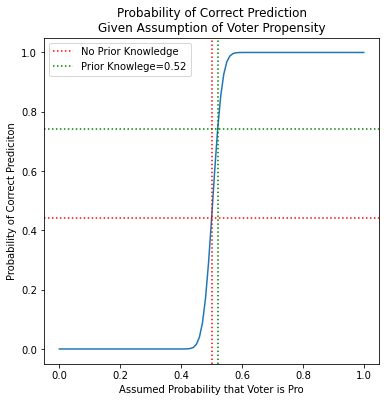

In [4]:
from scipy.stats import binom

fig, ax = plt.subplots(figsize=(6,6))
p=np.linspace(0.0, 1.0, 101, endpoint=True) # prior probabilty that voter is 'pro'

ax.plot(p,1-binom.cdf(201, 400, (p)))


ax.axvline(0.5, color='red', ls=':')
ax.axhline(1-binom.cdf(201, 400, 0.5), color='red', ls=":", label='No Prior Knowledge')

ax.axvline(0.52, color='green', ls=':')
ax.axhline(1- binom.cdf(201, 400, 0.52), color='green', ls=':', label='Prior Knowlege=0.52')

ax.set_xlabel('Assumed Probability that Voter is Pro')
ax.set_ylabel('Probability of Correct Prediciton')
ax.set_title('Probability of Correct Prediction\nGiven Assumption of Voter Propensity')
ax.legend(loc='upper left')

The plot above shows that higher the assumed inclination of a voter the greater the probability of predicting the vote correctly.  The dotted orange and green lines show the success probability with prefernece assumed ($p=0.50$) and with 20-20 hindsight ($p=0.52$). The intersection of these lines are consistent with the experimental results above.

## 2. Add uniform distributions to get a Gaussian
>Use SimData() to create an array of 100,000 numbers uniformly distributed from 0 to 1.
Then call the MyHistogram() to sort the numbers into thirty bins. Each bin should have
approximately 3333 entries into it. Plot the histogram. It should be flat.


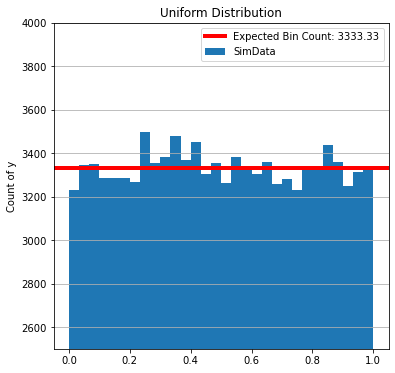

In [5]:
N=int(1e5)
nbins = 30
d1 = md()
d1.SimData(rand='Uniform', npt=N)
d1a = deepcopy(d1)
mu_hat = N/nbins #how many should be in each bin

fig, ax = plt.subplots(figsize=(6,6))

d1.MyHistogram(ax=ax, which='y', bins=30, label='SimData', title='Uniform Distribution')
ax.axhline(mu_hat, ls='-', lw=4, label=f'Expected Bin Count: {mu_hat:.2f}', color='red')
ax.set_ylim(2500, 4000)
ax.legend(loc='upper right')

The figure above shows a histogram of a sample of 100,000 uniformly distributed random variables. The red line shows the expected number of samples falling into each bin. In this case, the half-open interval $[0,0)$ is divided arbitrarily into 30 bins yielding a bin width of $\frac{1}{30}$ or 0.033. The expected count in each bin is $\frac{100,000}{30}$ of 3333.33 as the figure's legend shows. Below we show the number of bins over, matching and under their expected counts.

In [6]:
#compute over/under counts
xx=np.histogram(d1.y, bins=30)
bin_counts = xx[0]
print(f'Number of bins with higher than expected count: {(bin_counts>mu_hat).sum()}')
print(f'Number of bins with  expected count: {(bin_counts==mu_hat).sum()}')
print(f'Number of bins with lower than expected count: {(bin_counts<mu_hat).sum()}')

Number of bins with higher than expected count: 14
Number of bins with  expected count: 0
Number of bins with lower than expected count: 16


### Sum of Uniform Random Variables

>Create a new instance of MyData called, say, D2. Then, call D2.SimData() six more times. After
each call to D2.SimData() add the D2.x to D.x via D.x+=D2.x. Call D.MyHistogram and
overplot it on the first plot. The first one should look uniform, the second one should look
Gaussian. 

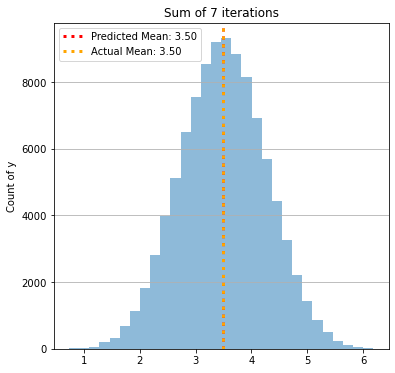

In [7]:
alpha = 0.0; beta = 1 #params of the uniform dist in this experiment

NReps = 6
NTrials = NReps+1 #because we already ran a trial in d1

d2 = md()
d1a = deepcopy(d1) # so we don't clobber the original

#run the experiment
for i in range(NReps):
    d2.SimData(rand='Uniform', npt=N)
    d1a.y += d2.y

mu_hat = (beta+alpha)*NTrials/2.0 #theoretical mu
mu_act = d1a.y.mean() #actual mu

fig,ax = plt.subplots(figsize=(6,6))
d1a.MyHistogram(ax=ax, which='y', bins=30, alpha=0.5, title=f'Sum of {NTrials} iterations')
ax.axvline(mu_hat, ls=':', lw=3, color = 'red', label=f'Predicted Mean: {mu_hat:.2f}')
ax.axvline(mu_act, ls=':', lw=3, color = 'orange', label=f'Actual Mean: {mu_act:.2f}')

ax.legend()


In the plot above, the predicted (red line) and actual (orange line) means of the sums of seven trials are so close to each other that they are indistinguishable in the figure and only the orange line appears.

In the figure below, we plot the original uniform distribution along with the sum of seven samples from the uniform distribution.  In order to make the distributions of the two samples comparable in the plot, the 'sum' distribution is normalize by dividing by the number of trials, otherwise the numbers would be seven times the other distribution. Also the histogram is plotted as a density to compensate for the fact that we have 7 times as many samles to bin.

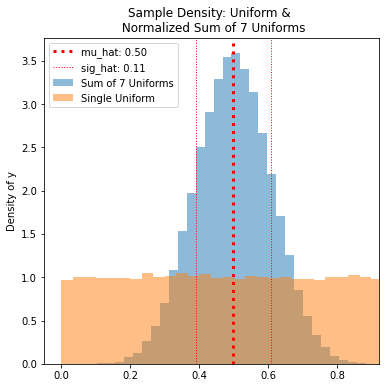

In [8]:
#Normalize by NTrials, result is len(d1a.y)=N measurements of mean of NTtials
d1a.y /= NTrials

#sample mean & standard deviation
mu_hat = d1a.y.mean()
sig_hat = d1a.y.std(ddof=1)

fig, ax = plt.subplots(figsize=(6,6))

d1a.MyHistogram(ax = ax,which='y', bins=30, label=f'Sum of {NTrials} Uniforms',  density=True, alpha=0.5)
d1.MyHistogram(ax=ax, which='y', bins=30, label='Single Uniform', density=True, alpha=0.5)
ax.axvline(mu_hat,ls=':', lw=3, color='red',label=f'mu_hat: {mu_hat:.2f}')
ax.axvline(mu_hat+sig_hat,ls=':', lw=1, color='red')
ax.axvline(mu_hat-sig_hat,ls=':', lw=1, color='red',label=f'sig_hat: {sig_hat:.2f}')

ax.set_title(f'Sample Density: Uniform & \n Normalized Sum of {NTrials} Uniforms')
ax.set_xlim(-0.05)
ax.legend()

The plot above shows that the sum of seven samples from the uniform distribution, repeated 100,000 times appears to be a Normal (i.e. Gaussian) distribution.

In [9]:
sig2_hat=(beta-alpha)**2*NTrials/12
sig2_act = d1a.y.std(ddof=1)**2
print(f'Observed Mean: {mu_act:.2f}, Predicted Mean: {mu_hat:.2f}, ratio: {mu_act/mu_hat:.4f}')
print(f'Observed Variance: {sig2_act:.2f}, Predicted Variance: {sig2_hat:.2f}, ratio: {sig2_act/sig2_hat:.4f}')

Observed Mean: 3.50, Predicted Mean: 0.50, ratio: 7.0000
Observed Variance: 0.01, Predicted Variance: 0.58, ratio: 0.0205


The output above shows that the predicted (theoretical) mean and standard deviation are quite close to the measures calculated from the sample.

## 3. Simulate an actual spectrum
>Create a new instance of the Star Class which puts the Sun (a G2V star) at 700,000pc, which is
the distance to the Great Nebula of Andromeda.
Create an instance of Instrument that performs spectroscopy in 100 bins from 0.3 microns to 2.1
microns. The collecting area should be set to a 2.4m diameter telescope with 60% efficiency.
Create a model spectrum of this star using the blackbody function from Assignment 5; however,
modify this function such that each bin has the expected number of photons rather than the
expected energy. Observe for 10,000seconds.
Modify the spectrum so each bin has expected photons rather than expected energy.
Add a Poisson simulator to SimData() and use it to generate Monte Carlo noise associated with
the expectation values.
Plot the simulated spectrum.
You now have a simulation of what Hubble can do on a very faint star. 

Photon energy, that is energy per photon is given by the Planck relation:
$$
\begin{align*}
e &= h\nu \\
e &= h\ c/\lambda

\end{align*}
$$

In our instrument(s), we know the total energy in each frequency-specific detector bin. Dividing this total energy by the energy per photon at the bin frequency will produce the photon count in the bin.

### 3A Black Body Model Revisited

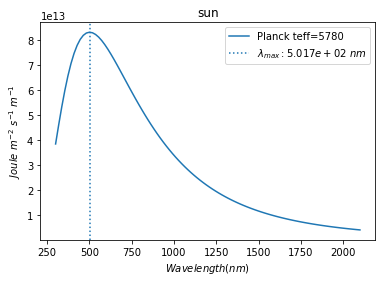

In [10]:
from Model.BlackBody import BlackBody as bb
#1 m = 1e6 um
#1 m = 1e9 nm
#1 um = 1e3 nm

#wavelength in micron
lam_min = 0.3; lam_max = 2.1; nlam=100
lam = np.linspace(lam_min, lam_max, nlam )
#convert to meters
mu_per_meter = 1e6
lam /= mu_per_meter

#black body model for sun at specified wavelength range
b_sun = bb('sun', 5780, lmbda=lam)

#plot the spectrum
b_sun.flux()
b_sun.plot_spectrum()
plt.legend()

### 3b Star Class

Text(0, 0.5, 'Watts per square meter')

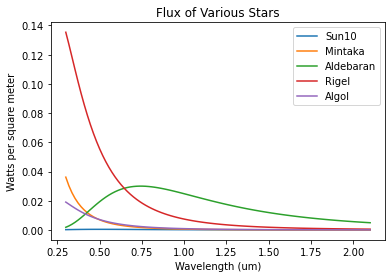

In [11]:
from Star.Star import Star

stars = {
        'Sun10':Star('Sun10', ra='00:00:04', dec='00:00:25', distance=10, mass= 1, teff=5780, radius=1.0),
        'Mintaka':Star(name='Mintaka', ra='05:32:00.4009', dec='-00:17:56.7424', distance=380, mass=24.0, teff=29500, radius=16.5),
        'Aldebaran':Star(name='Aldebaran', ra='04:35:55.23907', dec='16:30:33.4885', distance=20, mass=1.16, teff=3900, radius=45.1),
        'Rigel': Star(name='Rigel', ra='05:14:32.27210', dec='-08:12:05.8981', distance=264, mass=21.0, teff=12100, radius=78.9),
        'Algol': Star(name='Algol', ra='03:08:10.13245', dec='40:57:20.3280', distance=28, mass=3.17, teff=13000, radius=2.73),
}

#wavelength in micron
lam_min = 0.3; lam_max = 2.1; nlam=100
lam = np.linspace(lam_min, lam_max, nlam )
#convert to meters
mu_per_meter = 1e6
lam /= mu_per_meter


for s in stars:
    plt.plot(lam*mu_per_meter,stars[s].flux_spectrum(lmbda=lam),label=s)

plt.legend(loc='upper right')
plt.title('Flux of Various Stars')
plt.xlabel('Wavelength (um)')
plt.ylabel('Watts per square meter')

In [12]:
from Instrument.Instrument import Instrument as inst

### 3C: Instrument Class

>Create an instance of Instrument that performs spectroscopy in 100 bins from 0.3 microns to 2.1
microns. The collecting area should be set to a 2.4m diameter telescope with 60% efficiency.


In [13]:
help(inst.__init__)

Help on function __init__ in module Instrument.Instrument:

__init__(self, name='Unnamed', nlam=100, lam_min=100.0, lam_max=1000.0, diameter=1.0, efficiency=1.0)
    Constructs an Instrument object.
    
    Arguments:
        name: str; name of the instrument
        nlam: int; number of wavelength bins
        lam_min, lam_max: float; wavelength minimum and maximum, NANOMETERS
        diameter: float, diameter of instrument in meters
        efficiency: float (0,1): efficiency of the instrument



In [14]:
#1 um = 1000 nm
hubble = inst(name='Hubble Space Telescope',
 diameter=2.4, efficiency=0.6,
 nlam=100, lam_min=300, lam_max=2100)

hubble

Instrument Object; name = Hubble Space Telescope, nlam = 100, lam_min = 300, lam_max = 2100, diameter = 2.4, area = 4.523893421169302, eff_area = 2.714336052701581

In [15]:
target = Star('G2 star in Andomeda', ra='0:42:44', dec='+41:16:9', distance=7e5, mass= 1, teff=5780, radius=1.0)

target

Star object: name: G2 star in Andomeda, ra: 0:42:44, dec: +41:16:9, distance: 700000.0, radius: 1.0, mass: 1.0, teff: 5780.0

In [16]:
help(hubble.simulate)

Help on method simulate in module Instrument.Instrument:

simulate(star: Star.Star.Star, obstime: float, obstype: str = 'photon_counts') method of Instrument.Instrument.Instrument instance
    simulates observation of star for obstime seconds.
    
    Arguments:
        star: star object; the target of observation/simulation
        obstime: float; exposure time in seconds
        obstype: string {'photon_counts' 'flux'} specifies whether to comupte photon counts or flux
    
    Returns:
        dict of wavelength (key "lmbda") and photon count or flux (key: "photons" or "flux")



In [17]:
obstime=10e3 # seconds
sim = hubble.simulate(target, obstime)

Text(0.5, 1.0, 'Hubble Space Telescope')

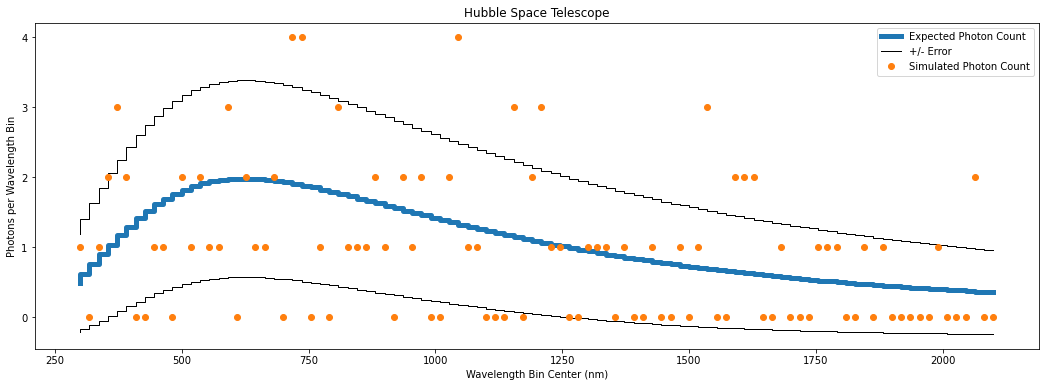

In [31]:
fig, ax = plt.subplots(figsize=(18,6))


ax.plot(sim['lmbda'], sim['expected'], label='Expected Photon Count', drawstyle='steps', lw=5)
ax.plot(sim['lmbda'], sim['expected']+sim['error'], drawstyle='steps', lw=1, color='black')
ax.plot(sim['lmbda'], sim['expected']-sim['error'], drawstyle='steps', lw=1, color='black', label='+/- Error')

ax.plot(sim['lmbda'], sim['simulated'], ls='None', marker='o', label='Simulated Photon Count')

ax.legend()
ax.set_ylabel('Photons per Wavelength Bin')
ax.set_xlabel('Wavelength Bin Center (nm)')
ax.set_title('Hubble Space Telescope')

